In [1]:
import pandas as pd
%pylab inline
import sklearn
import seaborn as sns
import statsmodels.regression.linear_model as sm
from sklearn.ensemble import RandomForestRegressor

Populating the interactive namespace from numpy and matplotlib


I will try to cover basic EDA which help new user to perform the EDA and ML so will strat with Importing data set 


In [2]:
#Import Data
data=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv',header=0)
data


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [3]:
#Checking 1st 5 row and if want to see more insert number into parentheses (10)
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
#Checking last 10 rows of data but by deafult it will show you last 5 row
data.tail(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
191,-1,74,volvo,std,four,wagon,rwd,front,104.3,0.907256,...,9.5,114.0,5400.0,23,28,13415.0,10.217391,Medium,0,1
192,-2,103,volvo,std,four,sedan,rwd,front,104.3,0.907256,...,9.5,114.0,5400.0,24,28,15985.0,9.791667,Medium,0,1
193,-1,74,volvo,std,four,wagon,rwd,front,104.3,0.907256,...,9.5,114.0,5400.0,24,28,16515.0,9.791667,Medium,0,1
194,-2,103,volvo,turbo,four,sedan,rwd,front,104.3,0.907256,...,7.5,162.0,5100.0,17,22,18420.0,13.823529,High,0,1
195,-1,74,volvo,turbo,four,wagon,rwd,front,104.3,0.907256,...,7.5,162.0,5100.0,17,22,18950.0,13.823529,High,0,1
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,19,25,22625.0,12.368421,Medium,0,1


In [5]:
#checking the missing values and at the smae time you can chekc the type of data, Stroke and Horse powerbinnd 
#in which values/string are missing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int64
make                 201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               197 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-n

In [6]:
# At the same time you can check with below syntex as well where you can see the sum of missing values available into data
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [7]:
# You can check total number of rows and cloumns
data.shape

(201, 29)

In [8]:
#you can check the name of cloumns present in data
data.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [9]:
# You can check types of data available into data
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [10]:
# you can see the max, min, mean, std, and quartiles of all numerice value
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


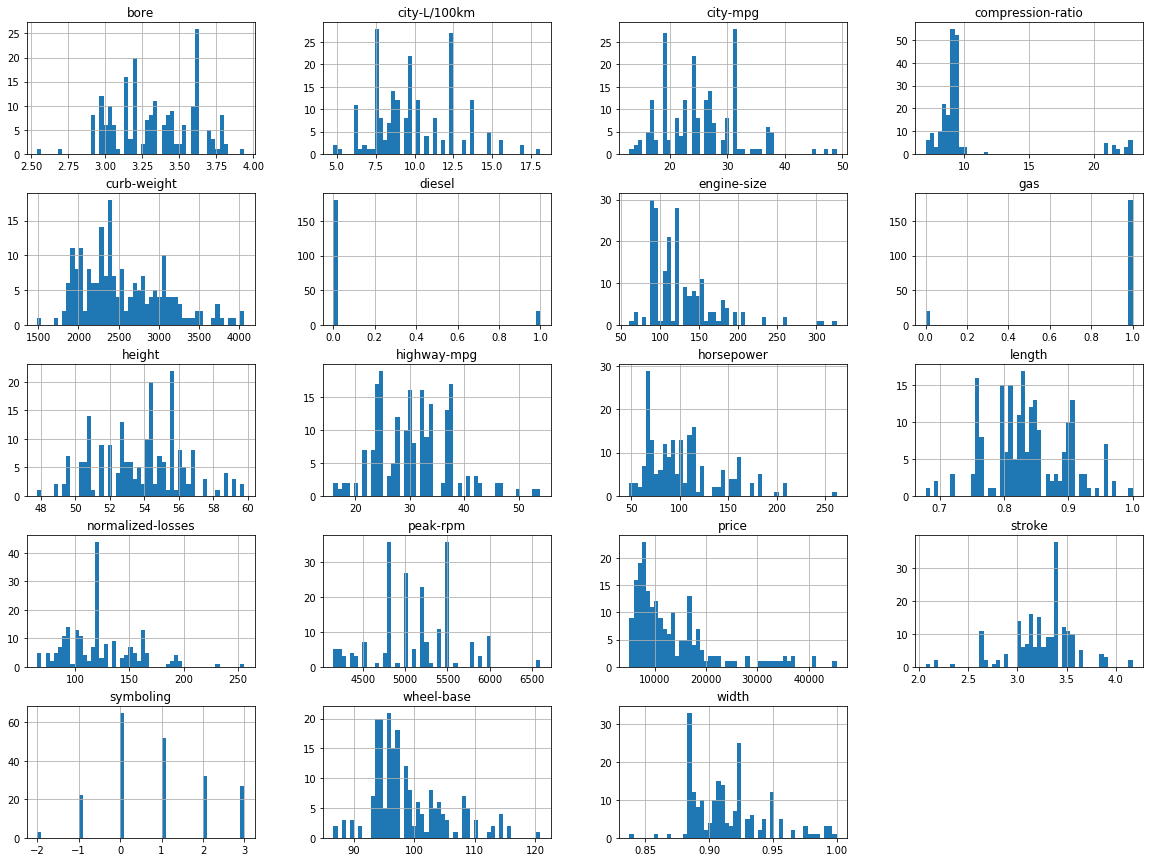

In [11]:
# histogram price range is b/w 50 to 160 and their milage is b/w 20 to 30 and so on 
data.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
#correlation matrix
corr_matrix=data.corr()

In [13]:
#correlation with Y=price with other independent variable (close to +1 strong postive correlation and -1 close to shows negative corelation which can bring the price of a car down,
# Close to '0' means no corelation )
corr_matrix['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
city-L/100km         0.789898
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
diesel               0.110326
stroke               0.082310
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101616
gas                 -0.110326
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

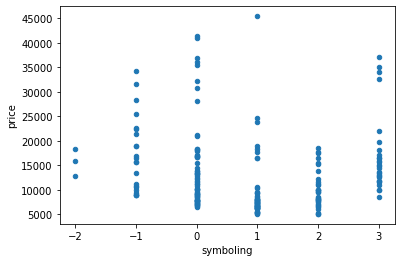

In [14]:
#Symboling corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then,
#if it is more risky (or less),this symbol is adjusted by moving it up (or down) the scale.
data.plot(kind='scatter',x='symboling',y = 'price')

In [15]:
# If you want to extract particular coloum for a view and we have a missing value in this coloum
data.loc[:,'stroke']

0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
       ... 
196    3.15
197    3.15
198    2.87
199    3.40
200    3.15
Name: stroke, Length: 201, dtype: float64

In [16]:
# It will help you to replace missing value with the median value of stroke which we can see 3.29 in describe as mention on above syntex
data.stroke.fillna('3.29', inplace=True)

In [17]:
data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [18]:
# If you want to check the number of object/string availabe in a particular coloum 
data.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

In [19]:
# Another way to check the count of string available into coloums
data["horsepower-binned"].value_counts()

Low       115
Medium     62
High       23
Name: horsepower-binned, dtype: int64

In [20]:
# we have missing string in horesepower-binned, as I have selected 'LOW' because is highest frequency
#data.horsepower-binned.fillna('Low', inplace=True)


In [21]:
#converting coloum 'stroke' into float
data.stroke=data.stroke.astype(float)

In [22]:
# Extracting all numeric value (float, Int.) and creating diffrent variable 
data_number=data.select_dtypes(include=np.number)
data_number

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,0,1
197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,0,1
198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,0,1
199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,1,0


In [23]:
# Extracting object and creating diffrent variable, with this we have not segragateed the original data into 2 part data_number & data_object
data_object=data.select_dtypes(include=np.object)
data_object

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
0,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
1,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium
3,audi,std,four,sedan,fwd,front,ohc,four,mpfi,Medium
4,audi,std,four,sedan,4wd,front,ohc,five,mpfi,Medium
...,...,...,...,...,...,...,...,...,...,...
196,volvo,std,four,sedan,rwd,front,ohc,four,mpfi,Medium
197,volvo,turbo,four,sedan,rwd,front,ohc,four,mpfi,High
198,volvo,std,four,sedan,rwd,front,ohcv,six,mpfi,Medium
199,volvo,turbo,four,sedan,rwd,front,ohc,six,idi,Medium


In [24]:
#Creating dummy variable for all clomum whose dtype is object so I have used data_object as dummy variable
#Latter on we will see how to use the dummy variable 
 
dummy=pd.get_dummies(data_object,drop_first=True)

In [25]:
dummy

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,...,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower-binned_Low,horsepower-binned_Medium
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [26]:
# Droping the coloum 

data=data.drop(columns=['horsepower-binned'])

In [27]:
# Lets handel Text and categorical attribute by lable Encoder & OneHotEncoder & LabelBinarizer
# I have created data here to perform EDA and ML (data) (data_number/data_object)

In [28]:
# let see how label Encoder help us to convert our categorical data 
from sklearn import preprocessing

In [29]:
label_encoder = preprocessing.LabelEncoder()
data['make']= label_encoder.fit_transform(data['make'])
data['aspiration']= label_encoder.fit_transform(data['aspiration'])
data['num-of-doors']= label_encoder.fit_transform(data['num-of-doors'])
data['body-style']= label_encoder.fit_transform(data['body-style'])
data['drive-wheels']= label_encoder.fit_transform(data['drive-wheels'])
data['engine-location']= label_encoder.fit_transform(data['engine-location'])
data['engine-type']= label_encoder.fit_transform(data['engine-type'])
data['num-of-cylinders']= label_encoder.fit_transform(data['num-of-cylinders'])
data['fuel-system']= label_encoder.fit_transform(data['fuel-system'])


In [30]:
#print(label_encoder.classes_)

In [31]:
data.shape

(201, 28)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 28 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int64
make                 201 non-null int32
aspiration           201 non-null int32
num-of-doors         201 non-null int32
body-style           201 non-null int32
drive-wheels         201 non-null int32
engine-location      201 non-null int32
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null int32
num-of-cylinders     201 non-null int32
engine-size          201 non-null int64
fuel-system          201 non-null int32
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-null float

In [33]:
#Declare the dependent variable and create your independent and dependent datasets
X = data.drop('price', axis=1).to_numpy()
Y = data['price'].to_numpy()

In [34]:
X.shape, Y.shape

((201, 27), (201,))

In [35]:
#Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.20, random_state=5)

In [36]:
from statsmodels.api import OLS
#Run model
lm = sm.OLS(Y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     49.71
Date:                Thu, 14 May 2020   Prob (F-statistic):           4.69e-56
Time:                        16:10:07   Log-Likelihood:                -1477.4
No. Observations:                 160   AIC:                             3009.
Df Residuals:                     133   BIC:                             3092.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -426.0599    319.659     -1.333      0.1

In [37]:
# As you can see that we have selected all predetor in our feature/Predetaor X due to which we can see multicollinerity, in next step you can start 
#droping x variable which is less corelation to its Y (Price),to have high accuracy.
#When a statistical model is used to represent the process that generated the data, the representation will almost never be exact; so some information will be lost by using the model to represent the process. 
# AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.

In [43]:
# Let try random forest 
model = RandomForestRegressor(n_jobs=-1)
estimators = 240
scores = []
model.set_params(n_estimators=estimators)
model.fit(X_train, Y_train)
scores.append(model.score(X_test, Y_test))

In [44]:
scores

[0.900564143022639]